In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
MAX_RECORDS = 100000

# Read and parse the CSV file
file_path = "movies.csv"

# Arrays to store data
h_gross = []
h_votes = []


In [2]:

with open(file_path, "r") as fp:
    # Skip the header line
    next(fp)
    
    for line in fp:
        columns = line.strip().split(",")
        if len(columns) > 7:
            try:
                votes = float(columns[5])
                gross = float(columns[6])
                if votes > 0 and gross > 0:
                    h_votes.append(votes)
                    h_gross.append(gross)
            except ValueError:
                continue  # Skip invalid entries
                
        if len(h_votes) >= MAX_RECORDS:
            break



In [3]:
h_votes = np.array(h_votes, dtype=np.float32)
h_gross = np.array(h_gross, dtype=np.float32)
record_count = len(h_votes)

print("First 10 h_votes:", h_votes[:10])
print("First 10 h_gross:", h_gross[:10])



First 10 h_votes: [7.4 5.1 6.1 6.7 8.1 6.6 3.7 4.9 7.2 8. ]
First 10 h_gross: [ 1300.   101.  1000.    75. 24000.  1600.   208.   360.   826. 17000.]


In [ ]:
# Linear regression calculations
x_sum = np.sum(h_votes)
y_sum = np.sum(h_gross)
xy_sum = np.sum(h_votes * h_gross)
xx_sum = np.sum(h_votes * h_votes)

slope = (record_count * xy_sum - x_sum * y_sum) / (record_count * xx_sum - x_sum ** 2)
intercept = (y_sum - slope * x_sum) / record_count

print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")


Slope: -1278.83
Intercept: 17596.13


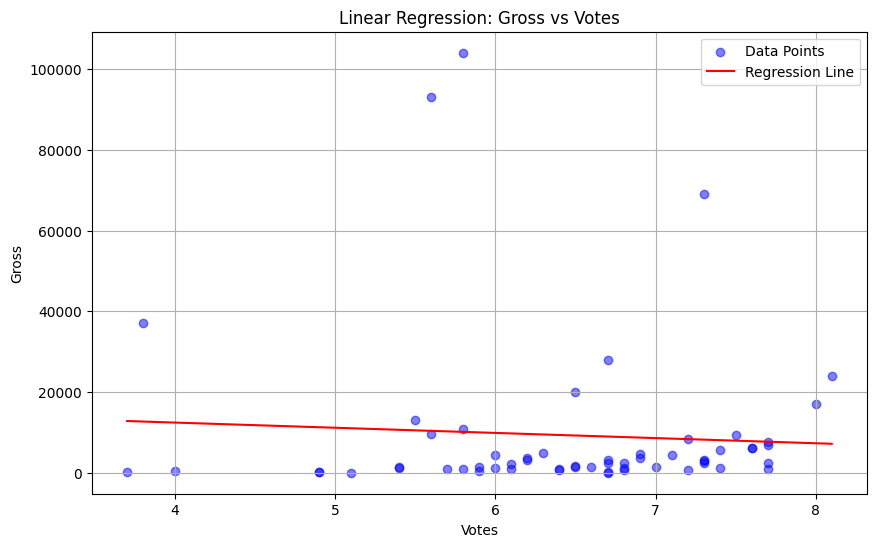

In [5]:
# Plotting the data points and regression line
plt.figure(figsize=(10, 6))
plt.scatter(h_votes, h_gross, color='blue', label='Data Points', alpha=0.5)
x_vals = np.linspace(min(h_votes), max(h_votes), 100)
y_vals = slope * x_vals + intercept
plt.plot(x_vals, y_vals, color='red', label='Regression Line')

plt.title("Linear Regression: Gross vs Votes")
plt.xlabel("Votes")
plt.ylabel("Gross")
plt.legend()
plt.grid()
plt.show()
